## Statistical tests.

### 1. Contionous Variable.
- 1 Sample Test
- - 1 sample Z test
  - 1 sample T test
- 2 Sample Test
- - 2 Sample test for equal variance.
  - 2 sample test for unequal variance.
- Anova Test.

### 2. Discrete Variable. 
- 1 Proportion test.
- 2 Proportion test.
- Chisquare Test. 

## Steps involved in statistical tests (Hypothesis Testing)

- Step 1: Formulate the Null Hypothesis (h)) and Alternate Hypothesis(H1)
- Step 2: Level of Significance (Alpha)
- Step 3: Check for Normality of given data (For continous data only) --> 1 Sample. Check for Variance or equal (2 or More samples).
- Step 4: Select the Statistical Test and calculate p value.
- Step 5: Based on p value, conclude the hypothesis test.
          If p <= Alpha (p low Null go) --> Reject H0
          If p > Alpha (p high Null Fly) --> do not Reject H0

## How to check for Normality. 

### Option 1 - Skewness::
- If the skewness is between -1 to +1 --> Then, it is normal distribution.
- If the skewness is less than -1 --> Then, it is said to be left skewed distribution.
- If the skewness is greater than +1 --> Then, it is said to be right skewed distribution.

### Option 2 - Density Curve::
- If the density curve is symmetrical --> Then, it is said to be normal distribution.
- If the density curve is non symmetrical --> then, it is said to be a Skewed Distribution.

### Option 3 - Shapiro test. 
- H0 : Data is Normal --> if p > alpha, then data is normal.
- H1 : Data is not normal --> if p <= alpha, then data is not normal. 

# ------------------- One sample Test-------
## Example 1:: Fabric Data. 

The length of 25 samples of a fabric are taken at random. Mean and standard deviation from the historic 2 years study are 150 and 4 respectively. Test if the current mean is greater than the historic mean. Assume alpha to be 0.05.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
# Load fabric data. 

fabric = pd.read_excel("Fabric data.xlsx")

fabric.head()

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2


#### Step 1:: Formulate of H0 and Ha
- H0: Mean >= 150.
- Ha : Mean < 150.

#### Step 2:: Select Level of Significance. 
- Alpha = 0.05 (given).

#### Step 3:: Check for Normality. 


In [5]:
#option 1 --> Skewness. 
fabric["Fabric_length"].skew()

0.29650632012590666

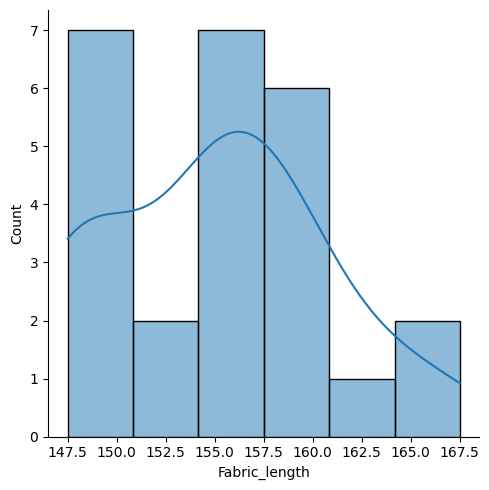

In [6]:
#option 2 --> Density Curve
sns.displot(fabric["Fabric_length"],kde=True)
plt.show()

In [7]:
#Option 3 --> Shapiro test (h0 - data is normal)

stats.shapiro(fabric["Fabric_length"])

ShapiroResult(statistic=0.9397523999214172, pvalue=0.14609353244304657)

#### - From above three options we can say that the sample data is normally distributed. 

#### Step 4:: Select the statistical test and calculate p value. 
- 1 sample Z test 

In [8]:
fabric["Fabric_length"].mean()

155.06399999999996

In [9]:
z_cal = (155.06-150) / (4/np.sqrt(25))
print(z_cal)

6.325000000000003


In [13]:
p = stats.norm.cdf(z_cal)
print(p)

# stats.norm.cdf give leftside area of distrubution. And in this case we reject only sample which less than 150.

0.9999999998733837


#### Step 5:: Based on p value, Accept or Reject H0
- P > alpha (0.9999 > 0.05)
- P high, Null Fly.
- Do not reject H0 or Accpet H0 --> Mean > 150(no action required). 

## ----------------------
### Bolt Diameter ------ 1-sample T test.
The mean diameter of the bolt manufactured should be 10 mm to be able to fit into the nut. 20 samples are taken at random from production line by a quality inspector. Conduct a test to check with 95% confidence that the mean is not different from the specification value. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
# Read the data. 

bolt = pd.read_excel("Bolt diameter.xlsx")
bolt.head()

,Diameter
0,10.00
1,10.01
2,10.02
3,9.99
4,10.00


##### Step 1: Formulate H0 and H1

H0 : μ = 10mm (No action and Bolt should be exact size to fit in Nut).
H1 : μ != 10mm  (Action required, inorder to correct this). 

##### Step 2: Select Level of Significance.

α = 0.05 (stated 95% confidence)

In [6]:
#step 3: Check for Normality (skewness)

bolt["Diameter"].skew()

0.9377400845737698

##### Step 4: Select the statistical test & Calculate the p value. 
- Since population standard deviation is not given and number of samples are less than 30. We should select T test ( 1 sample because there is only one column). 

In [10]:
stats.ttest_1samp(bolt["Diameter"], 10)

Ttest_1sampResult(statistic=1.0398561501518244, pvalue=0.3114592594451563)

##### Step 5: Based on P value reject or accept H0.

- Since p < alpha.
- p low, null go.
- Reject H0 (Average bolt diameter is not equal to 10) --> take Action. 

## ----------------------
### Marketing Stategy.
A financial analyst at a Financial institute wants to evaluate a recent Credit card promotion. After this promotion, 500 cardholders were randomly selected. Half received an ad promoting a full waiver of interest rate on purchases made over the next three months, and half received a standard christmas advertisement. Did the ad promoting full interest rate waiver, increase purchases?

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [12]:
credit_promo = pd.read_excel("Promotion.xlsx")

credit_promo.head()

,InterestRateWaiver,StandardPromotion
0,1989.10,1272.25
1,1808.38,1250.38
2,1153.75,1474.78
3,1745.64,2064.89
4,1008.24,2030.87


### Step 1: Formulation of H0 and H1.
- H0: Avg purchases made by FIW = Avg purchases made by SC ==> Default / current / no action.
- H1 : Avg purchases made by FIW != Ave purchases made by SC ==> take Action.

### Step 2: Select Level of significance. 
- Alpha = 0.05 (not given, so we take by default this value).

### Step 3: Check for normality. 

In [13]:
credit_promo["InterestRateWaiver"].skew()

-0.186848927819777

In [14]:
credit_promo["StandardPromotion"].skew()

0.1556560407787534

### Step 4: Select the test.
- Since the data set has two samples we can only do 2 sample T test (no other option is available). 
- In 2 sample T test we have two options based on population variance. 
- - Population variance of sample 1 = Population variance of sample 2  (Note this is population variance)
  - Population variacne of sample 1 != Population variance of sample 2.
- In the question we only know the sample variance (since we only have sample data and not population data), so we need to estimate population variance of sample 1 and sample 2 by using Levene Test (Variance Tests).

### Variance test - Levene Test. 
- H0: Variances are equal (p>0.05)
- H1: Variances are not equal (P <= 0.05)


In [15]:
stats.levene(credit_promo.InterestRateWaiver,credit_promo.StandardPromotion)

LeveneResult(statistic=1.1334674473666406, pvalue=0.2875528565130808)

Sicne p value is greater than 0.05 we can conclude that population variance of the two samples given are equal. So finally we need to select 2 sample, equal variance, T test. 

In [16]:
### Actual test
stats.ttest_ind(credit_promo.InterestRateWaiver,credit_promo.StandardPromotion,equal_var=True)

Ttest_indResult(statistic=2.260425163136941, pvalue=0.02422584468584312)

### Step 5: Based on the p value, Accept or rejet H0.

- p < alpha.
- p low, null go.
- Reject H0 (FIW = SC)--> Take Action. 